In [1]:
import pandas as pd
import numpy as np
np.random.seed(2017) #important to set the seed before importing keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns

Using Theano backend.


In [2]:
%matplotlib inline

In [3]:
sns.set()
sns.set_style('ticks')

In [4]:
#load the dataset
df = pd.read_csv("HR_comma_sep.csv")

In [5]:
#preview
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
df.rename(columns={'sales':'department'},inplace=True)

In [8]:
#let's convert the two categorical variables 'department' and 'salary' into dummy-variables for modelling

In [9]:
df = pd.get_dummies(df,columns=['department','salary'])

In [10]:
x,y = df.drop('left',axis=1).values, df.left.values

In [11]:
# let's do a training-test split for validation later on

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=2017)

In [12]:
# let's convert our output variable into categorical format for keras

num_classes = np.max(y_train)+1
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [13]:
x_train.shape

(10499, 20)

In [14]:
n_cols = x_train.shape[1]

In [15]:
#set-up early-stopping monitor
early_stopping_monitor = EarlyStopping(patience=5)

# Baseline Model

Train on 8399 samples, validate on 2100 samples
Epoch 1/100
8399/8399 [==============================] - 0s - loss: 0.6132 - acc: 0.7453 - val_loss: 0.4949 - val_acc: 0.7729
Epoch 2/100
8399/8399 [==============================] - 0s - loss: 0.5127 - acc: 0.7594 - val_loss: 0.4505 - val_acc: 0.7681
Epoch 3/100
8399/8399 [==============================] - 0s - loss: 0.4770 - acc: 0.7663 - val_loss: 0.4253 - val_acc: 0.7686
Epoch 4/100
8399/8399 [==============================] - 0s - loss: 0.4496 - acc: 0.7793 - val_loss: 0.4061 - val_acc: 0.7662
Epoch 5/100
8399/8399 [==============================] - 0s - loss: 0.4283 - acc: 0.7893 - val_loss: 0.3885 - val_acc: 0.7710
Epoch 6/100
8399/8399 [==============================] - 0s - loss: 0.4117 - acc: 0.7997 - val_loss: 0.3739 - val_acc: 0.7781
Epoch 7/100
8399/8399 [==============================] - 0s - loss: 0.3976 - acc: 0.8095 - val_loss: 0.3711 - val_acc: 0.7710
Epoch 8/100
8399/8399 [==============================] - 0s - loss: 0.

[0.25593803686565825, 0.90288888883590701]

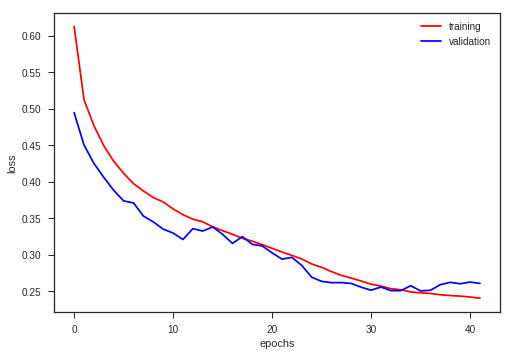

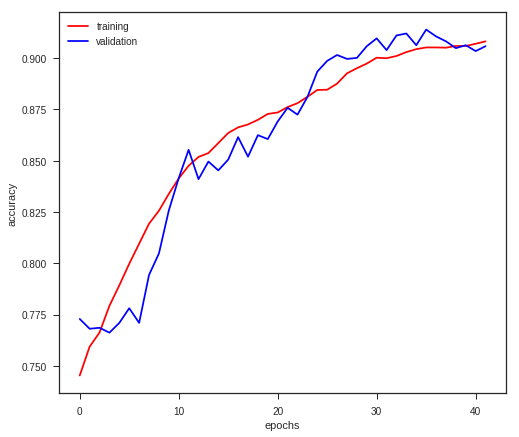

In [16]:
# configure our neural-net
np.random.seed(2017) #important to set the seed for reproducibility
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,)))
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,
                    epochs=100,verbose=1,validation_split=0.2,
                    callbacks=[early_stopping_monitor],shuffle=False)

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

model.evaluate(x_test,y_test)


In [17]:
# Let's increase number of nodes in the hidden layer and repeat 

# Model-2 : Increasing number of nodes in hidden layer

Train on 8399 samples, validate on 2100 samples
Epoch 1/100
8399/8399 [==============================] - 0s - loss: 0.7075 - acc: 0.7378 - val_loss: 0.4806 - val_acc: 0.7724
Epoch 2/100
8399/8399 [==============================] - 0s - loss: 0.5155 - acc: 0.7553 - val_loss: 0.4538 - val_acc: 0.7705
Epoch 3/100
8399/8399 [==============================] - 0s - loss: 0.4946 - acc: 0.7606 - val_loss: 0.4499 - val_acc: 0.7652
Epoch 4/100
8399/8399 [==============================] - 0s - loss: 0.4803 - acc: 0.7626 - val_loss: 0.4456 - val_acc: 0.7633
Epoch 5/100
8399/8399 [==============================] - 0s - loss: 0.4708 - acc: 0.7645 - val_loss: 0.4414 - val_acc: 0.7662
Epoch 6/100
8399/8399 [==============================] - 0s - loss: 0.4602 - acc: 0.7662 - val_loss: 0.4364 - val_acc: 0.7686
Epoch 7/100
8399/8399 [==============================] - 0s - loss: 0.4492 - acc: 0.7720 - val_loss: 0.4274 - val_acc: 0.7748
Epoch 8/100
8399/8399 [==============================] - 0s - loss: 0.

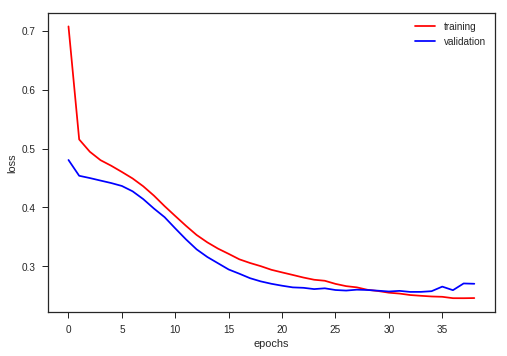

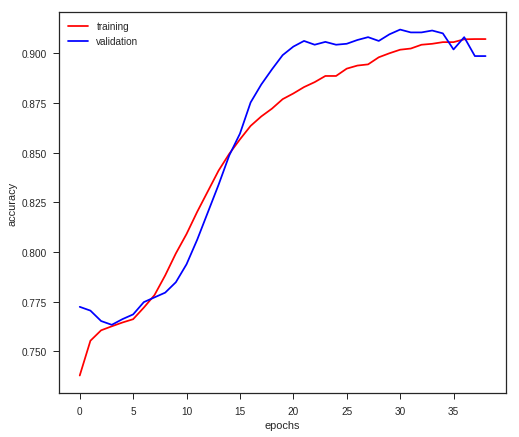

In [18]:
# configure our neural-net
np.random.seed(2017) #important to set the seed for reproducibility
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(n_cols,))) #changed number of hidden layers from 50 to 100
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,epochs=100,verbose=1,
                    validation_split=0.2,callbacks=[early_stopping_monitor],
                   shuffle=False)

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

print "Model Evaluation on test dataset [loss,accuracy] ",model.evaluate(x_test,y_test)


In [19]:
# we see that increasing the number of nodes in the hidden layer didn't help, let's move on to model-3

# Model 3: Adding more hidden layers

Train on 8399 samples, validate on 2100 samples
Epoch 1/20
8399/8399 [==============================] - 0s - loss: 0.6501 - acc: 0.7204 - val_loss: 0.5004 - val_acc: 0.7724
Epoch 2/20
8399/8399 [==============================] - 0s - loss: 0.5120 - acc: 0.7553 - val_loss: 0.4111 - val_acc: 0.8205
Epoch 3/20
8399/8399 [==============================] - 0s - loss: 0.4316 - acc: 0.7953 - val_loss: 0.3624 - val_acc: 0.8519
Epoch 4/20
8399/8399 [==============================] - 0s - loss: 0.3982 - acc: 0.8158 - val_loss: 0.3528 - val_acc: 0.8643
Epoch 5/20
8399/8399 [==============================] - 0s - loss: 0.3895 - acc: 0.8208 - val_loss: 0.3321 - val_acc: 0.8762
Epoch 6/20
8399/8399 [==============================] - 0s - loss: 0.3647 - acc: 0.8355 - val_loss: 0.3333 - val_acc: 0.8733
Epoch 7/20
8399/8399 [==============================] - 0s - loss: 0.3483 - acc: 0.8461 - val_loss: 0.3342 - val_acc: 0.8738
Epoch 8/20
8399/8399 [==============================] - 0s - loss: 0.3385 - a

[0.31913121981090969, 0.87688888894187078]

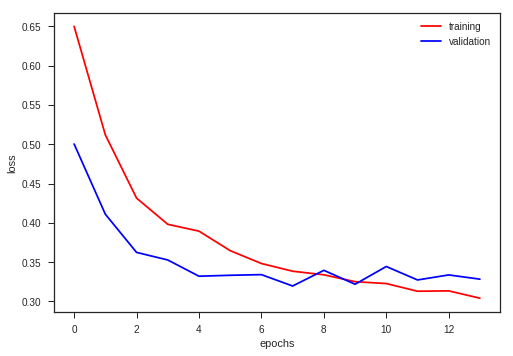

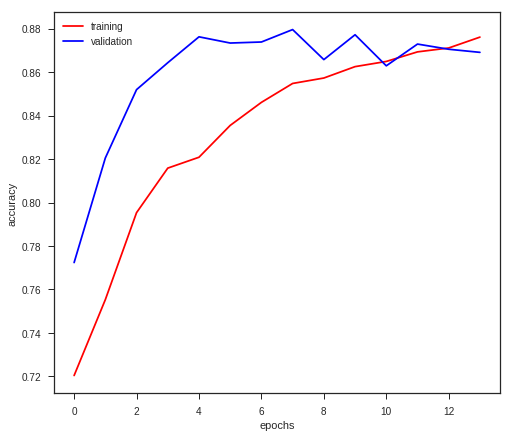

In [20]:
# configure our neural-net
np.random.seed(2018) #important to set the seed for reproducibility
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,))) 
model.add(Dense(50,activation='relu')) 
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,epochs=20,verbose=1,
                    validation_split=0.2,callbacks=[early_stopping_monitor],
                    shuffle=False)

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

print "Model Evaluation on test dataset [loss,accuracy] ",
model.evaluate(x_test,y_test)


In [21]:
#increasing the number of layers certainly helped which leads us to our next model where make the model deeper

# Model 4 : Making it more deep model

Train on 8399 samples, validate on 2100 samples
Epoch 1/50
8399/8399 [==============================] - 0s - loss: 0.8574 - acc: 0.7290 - val_loss: 0.5059 - val_acc: 0.7710
Epoch 2/50
8399/8399 [==============================] - 0s - loss: 0.5453 - acc: 0.7453 - val_loss: 0.4704 - val_acc: 0.7638
Epoch 3/50
8399/8399 [==============================] - 0s - loss: 0.5045 - acc: 0.7540 - val_loss: 0.4451 - val_acc: 0.7595
Epoch 4/50
8399/8399 [==============================] - 0s - loss: 0.4788 - acc: 0.7619 - val_loss: 0.4220 - val_acc: 0.7586
Epoch 5/50
8399/8399 [==============================] - 0s - loss: 0.4506 - acc: 0.7752 - val_loss: 0.3980 - val_acc: 0.7762
Epoch 6/50
8399/8399 [==============================] - 0s - loss: 0.4254 - acc: 0.7856 - val_loss: 0.3766 - val_acc: 0.7814
Epoch 7/50
8399/8399 [==============================] - 0s - loss: 0.4022 - acc: 0.8016 - val_loss: 0.3588 - val_acc: 0.8014
Epoch 8/50
8399/8399 [==============================] - 0s - loss: 0.3812 - a

[0.31322626781463625, 0.878]

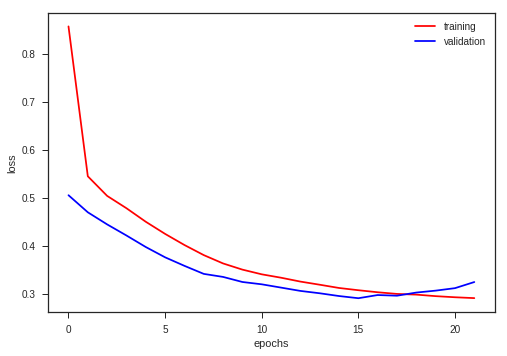

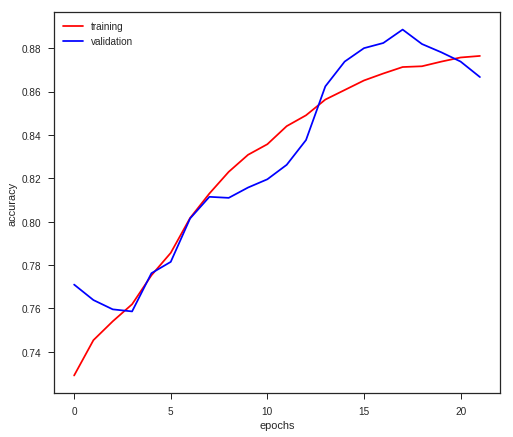

In [22]:
# configure our neural-net
np.random.seed(2019)
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,))) 
model.add(Dense(50,activation='relu')) 
# model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fit
history = model.fit(x_train,y_train,epochs=50,
                    verbose=1,validation_split=0.2,
                    callbacks=[early_stopping_monitor],shuffle=False)

model.summary()

#plot training and validation los
plt.plot(history.history['loss'],'r',label='training')
plt.plot(history.history['val_loss'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plot training and validation accuracy
plt.figure(figsize=(8,7))
plt.plot(history.history['acc'],'r',label='training')
plt.plot(history.history['val_acc'],'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# so we see that our baseline model has quite good accuracy just after 20 epochs

#let's evaluate our model to predict on our hold-out data

print "Model Evaluation on test dataset [loss,accuracy] ",
model.evaluate(x_test,y_test)
